# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 16, 2018

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data

In [11]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [12]:
tfidf_vectorizer = TfidfVectorizer(min_df=30, stop_words='english')
X = tfidf_vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

In [13]:
y

array([2, 2, 0, ..., 0, 2, 3])

## 2. NMF - Nonnegative Matrix Factorization

In [14]:
# <TODO> import proper class
from sklearn.decomposition import NMF

# <TODO> uncomment below. choose q that minimizes reconstruction error below (try a few values. no need to search exhaustively)
q = 4

# <TODO> uncomment below. initialize NMF model
nmf = NMF(n_components=q, init='random', random_state=0)
Z = nmf.fit_transform(X)
# <TODO> uncomment below. train NMF model and retrieve the low-dimension projection of X.
W = nmf.components_
#Z = np.transpose(X.dot(np.transpose(W)))
# <TODO> uncomment below. retrieve reconstruction error
error = nmf.reconstruction_err_

In [15]:
print ("Reconstruction error : {:.4f}".format(error))

Reconstruction error : 46.4490


In [16]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', Z.shape)

Original Shape:  (2369, 1529)
Reduced Shape:  (2369, 4)


## 3. Visualizing the reduced data points

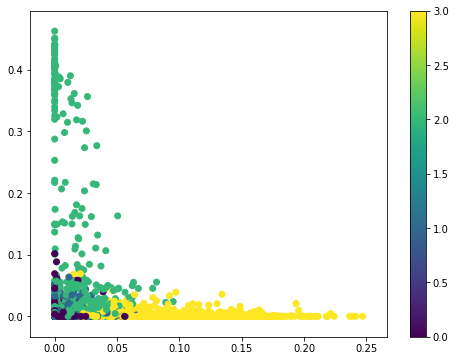

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c = y)
plt.colorbar()

## 4. Analysis

In [18]:
# <TODO> uncomment below. Retrieve W
W = nmf.components_

In [19]:
W.shape

(4, 1529)

In [20]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(W[i])

    print ('TOPIC ' + str(i))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

TOPIC 0
faith christ church christian believe bible christians people jesus god

TOPIC 1
n3jxp cadre dsl shameful edu cs gordon banks geb pitt

TOPIC 2
like organization sun msg writes dod article ca bike com

TOPIC 3
subject lines host nntp posting drive university apple mac edu

